Link for Titanic dataset : https://www.kaggle.com/c/titanic/overview

<h2 style="color:blue" align="left"> 1. Loading libraries </h2>

In [1]:
# data analysis and wrangling
import numpy as np
import pandas as pd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()   # set visualisation style
import matplotlib.style as style
style.use('fivethirtyeight')

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

<h2 style="color:blue" align="left"> 2. Loading data </h2>

In [2]:
train = pd.read_csv("train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test = pd.read_csv("test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train.shape, test.shape

((891, 12), (418, 11))

In [5]:
train.Sex.unique()

array(['male', 'female'], dtype=object)

In [6]:
train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [7]:
train.Pclass.unique()

array([3, 1, 2], dtype=int64)

In [8]:
train.Survived.unique()

array([0, 1], dtype=int64)

In [31]:
train.count() # does not include NaN values

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [32]:
test.count()

PassengerId    418
Pclass         418
Name           418
Sex            418
Age            332
SibSp          418
Parch          418
Ticket         418
Fare           417
Cabin           91
Embarked       418
dtype: int64

In [8]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [10]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dakic, Mr. Branko",male,1601,G6,S
freq,1,577,7,4,644


<h2 style="color:blue" align="left"> 3. Missing Values </h2>

In [14]:
train.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [15]:
test.isnull().sum().sort_values(ascending=False)

Cabin          327
Age             86
Fare             1
Embarked         0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
PassengerId      0
dtype: int64

### Train data
- No of missing values more than '0'

In [36]:
missing_train = train.isnull().sum().sort_values(ascending=False)
missing_train = missing_train[missing_train>0]
missing_train

Cabin       687
Age         177
Embarked      2
dtype: int64

In [38]:
total = missing_train
percent = round(missing_train/len(train)*100, 2)[round(missing_train/len(train)*100, 2) != 0]
pd.concat([total, percent], axis=1, keys=['Total','Percent'])

,Total,Percent
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22


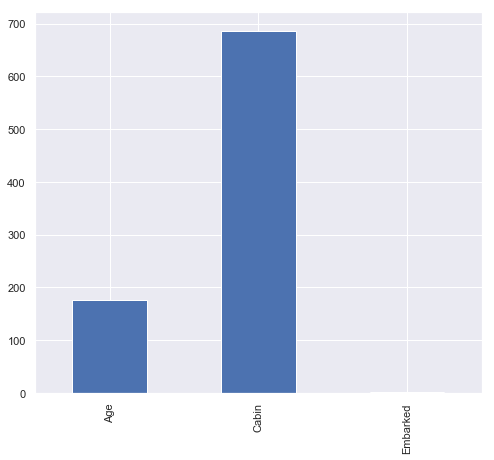

In [18]:
plt.figure(figsize=(8,7))
missing_train.plot.bar()

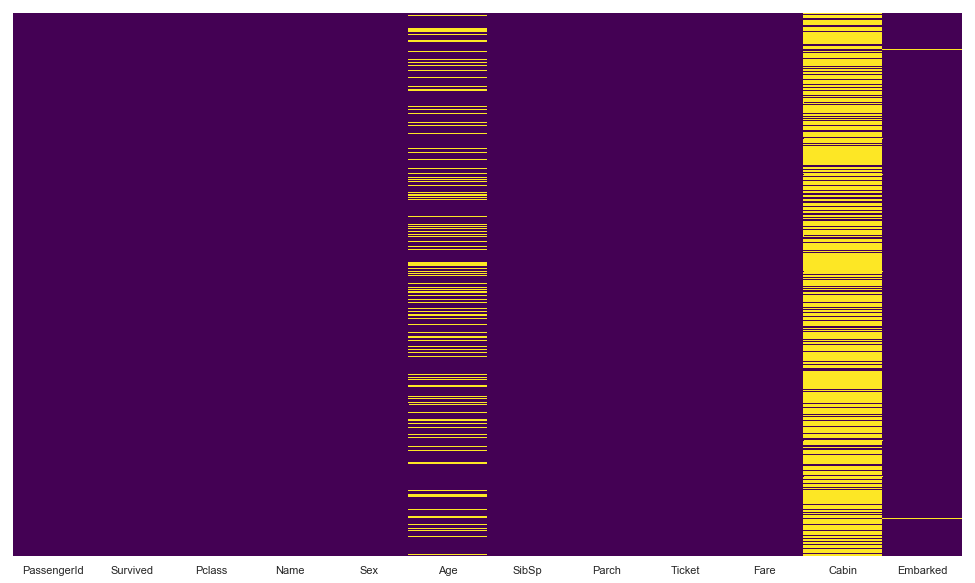

In [25]:
plt.figure(figsize=(17,10))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

#### No of Missing Values more than 25%
- Length of dataset = 891 (No of rows per column)
- Columns have missing values more than 25%   ------>    891*25/100 = 223

In [39]:
missing_train[missing_train>223].sort_values(ascending=False)

Cabin    687
dtype: int64

### Test data
- No of missing values more than '0'

In [43]:
missing_test = test.isnull().sum().sort_values(ascending=False)
missing_test = missing_test[missing_test>0]
missing_test

Cabin    327
Age       86
Fare       1
dtype: int64

In [44]:
total = missing_test
percent = round(missing_test/len(test)*100, 2)[round(missing_test/len(test)*100, 2) != 0]
pd.concat([total, percent], axis=1, keys=['Total','Percent'])

,Total,Percent
Cabin,327,78.23
Age,86,20.57
Fare,1,0.24


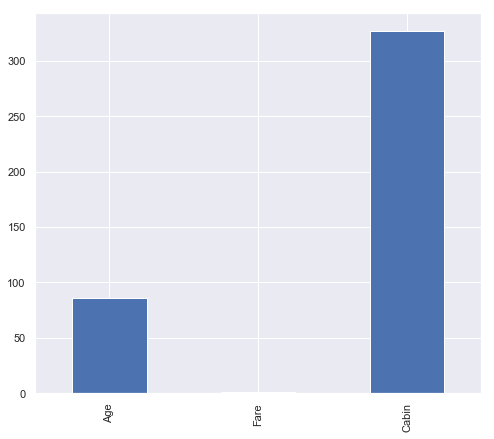

In [22]:
plt.figure(figsize=(8,7))
missing_test.plot.bar()

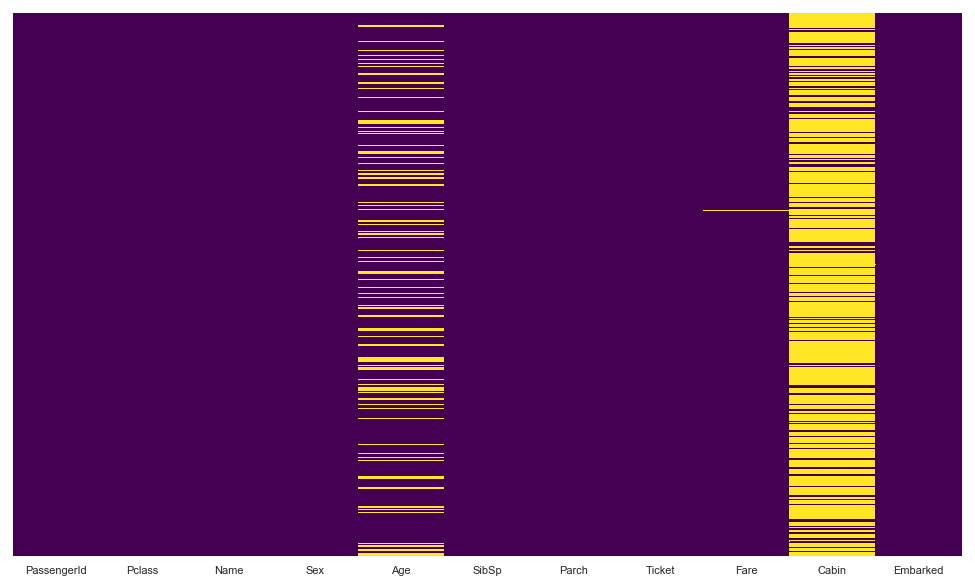

In [26]:
plt.figure(figsize=(17,10))
sns.heatmap(test.isnull(), yticklabels=False, cbar=False, cmap='viridis')

#### No of Missing Values more than 25%
- Length of dataset = 418 (No of rows per column)
- Columns have missing values more than 25%   ------>    418*25/100 = 105

In [40]:
missing_test[missing_test>105].sort_values(ascending=False)

Cabin    327
dtype: int64

<h2 style="color:blue" align="left"> 4. Numeric and Categorical Features </h2>

### Train : Numeric Features

In [47]:
numeric_cols_train = train.select_dtypes(exclude=object)
display(numeric_cols_train.head())
print('\n')
numeric_cols_train.columns

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [49]:
numeric_cols_train.shape

(891, 7)

In [50]:
numeric_cols_train.isnull().sum().sort_values(ascending=False)

Age            177
Fare             0
Parch            0
SibSp            0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

### Train : Categorical Features

In [48]:
Categorical_cols_train = train.select_dtypes(include=object)
display(Categorical_cols_train.head())
print('\n')
Categorical_cols_train.columns

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [51]:
Categorical_cols_train.shape

(891, 5)

In [53]:
Categorical_cols_train.isnull().sum().sort_values(ascending=False)

Cabin       687
Embarked      2
Ticket        0
Sex           0
Name          0
dtype: int64

### Test : Numeric Features

In [54]:
numeric_cols_test = test.select_dtypes(exclude=object)
display(numeric_cols_test.head())
print('\n')
numeric_cols_test.columns

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,892,3,34.5,0,0,7.8292
1,893,3,47.0,1,0,7.0000
2,894,2,62.0,0,0,9.6875
3,895,3,27.0,0,0,8.6625
4,896,3,22.0,1,1,12.2875


Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [55]:
numeric_cols_test.shape

(418, 6)

In [56]:
numeric_cols_test.isnull().sum().sort_values(ascending=False)

Age            86
Fare            1
Parch           0
SibSp           0
Pclass          0
PassengerId     0
dtype: int64

### Test : Categorical Features

In [57]:
Categorical_cols_test = test.select_dtypes(include=object)
display(Categorical_cols_test.head())
print('\n')
Categorical_cols_test.columns

,Name,Sex,Ticket,Cabin,Embarked
0,"Kelly, Mr. James",male,330911,NaN,Q
1,"Wilkes, Mrs. James (Ellen Needs)",female,363272,NaN,S
2,"Myles, Mr. Thomas Francis",male,240276,NaN,Q
3,"Wirz, Mr. Albert",male,315154,NaN,S
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,3101298,NaN,S


Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [58]:
Categorical_cols_test.shape

(418, 5)

In [59]:
Categorical_cols_test.isnull().sum().sort_values(ascending=False)

Cabin       327
Embarked      0
Ticket        0
Sex           0
Name          0
dtype: int64

<h2 style="color:blue" align="left"> 5. EDA (Exploratory Data Analysis) </h2>

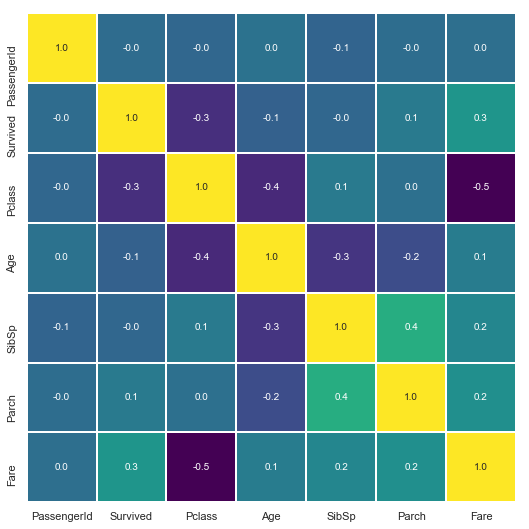

In [73]:
plt.figure(figsize=(13,9))
sns.heatmap(numeric_cols_train.corr(), annot=True, cbar=False, cmap='viridis', linewidth=1, fmt='.1f', square=True)

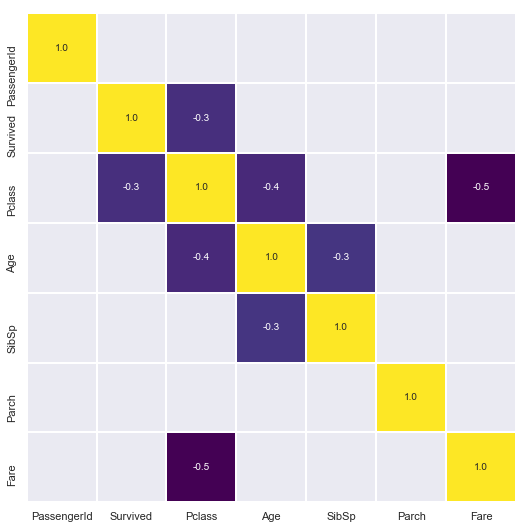

In [74]:
plt.figure(figsize=(13,9))
corr = numeric_cols_train.corr()
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.3)], annot=True, cbar=False,
                                 cmap='viridis', linewidth=1, fmt='.1f', square=True)

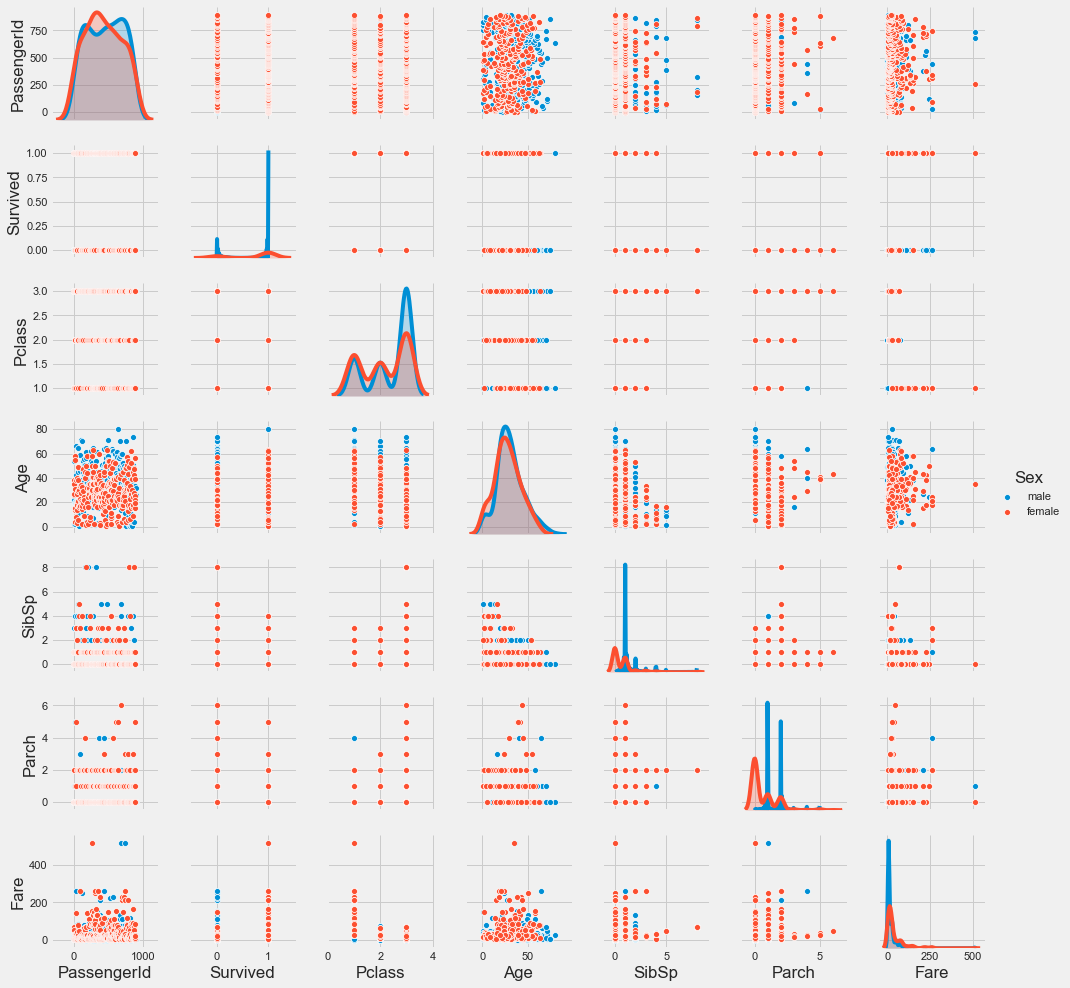

In [79]:
sns.pairplot(train, hue='Sex', height=2, kind='scatter', diag_kind='kde')

<h3 style="color:green" align="left"> Univariate Analysis ---->  plotting only a single feature </h3>

### Target variable

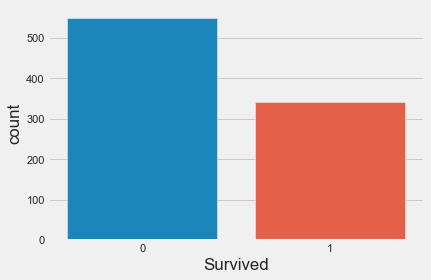

In [93]:
sns.countplot(x='Survived', data=train)

### Feature Variables

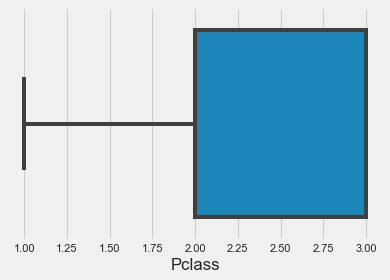

In [109]:
sns.boxplot(train.Pclass)

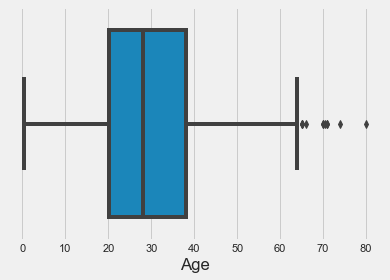

In [111]:
sns.boxplot(train.Age)

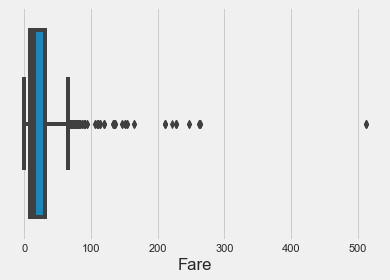

In [112]:
sns.boxplot(train.Fare)

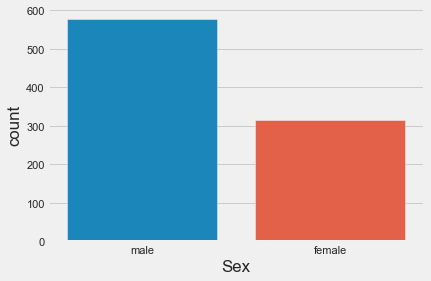

In [92]:
sns.countplot(x='Sex', data=train)

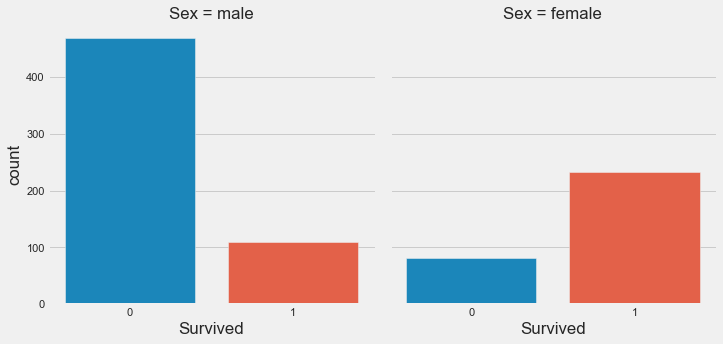

In [90]:
sns.catplot(x='Survived', col='Sex', kind='count', data=train)

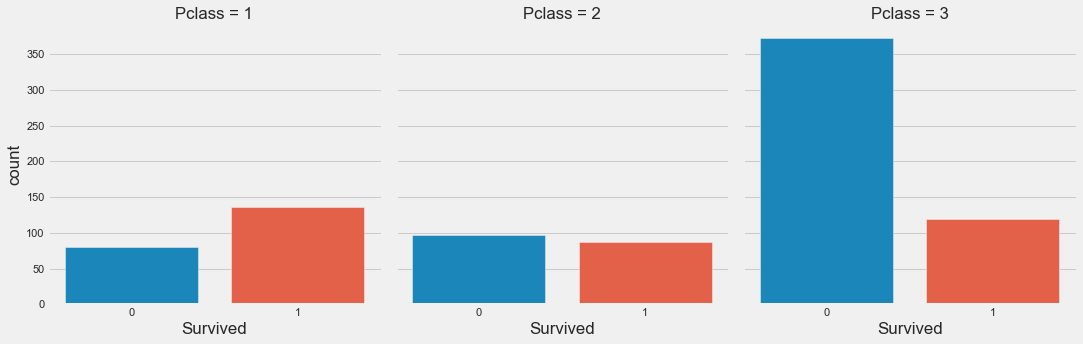

In [87]:
sns.catplot(x='Survived', col='Pclass', kind='count', data=train)

- passengers travelled in third class were more unlikely to survive

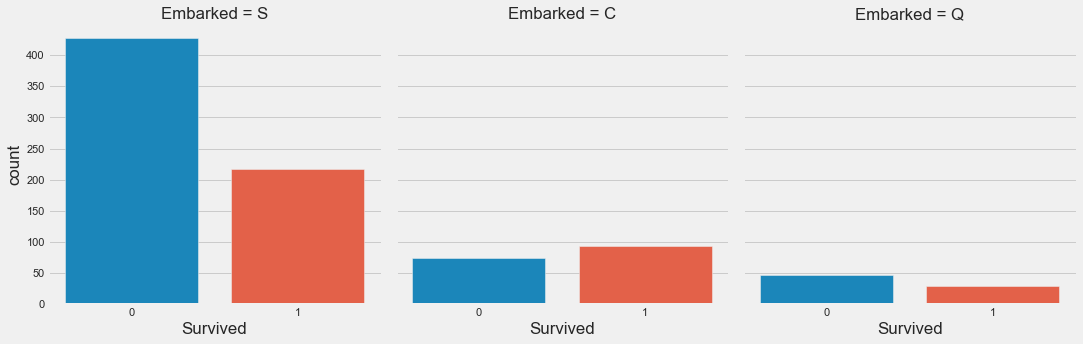

In [91]:
sns.catplot(x='Survived', col='Embarked', kind='count', data=train)

- Women were survived than men

### Numeric Variables

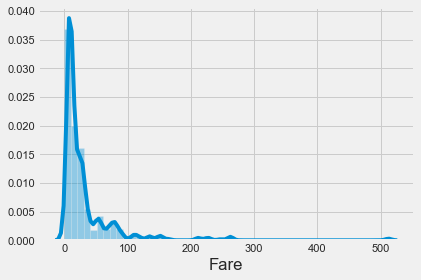

In [94]:
sns.distplot(train.Fare)

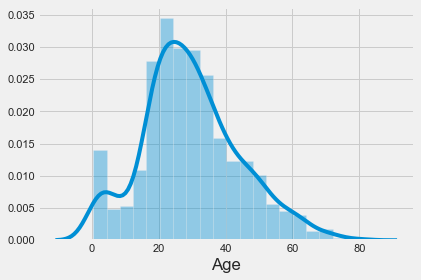

In [96]:
sns.distplot(train.Age.dropna())

<h3 style="color:green" align="left"> Bivariate Analysis ---->  plotting two variables </h3>

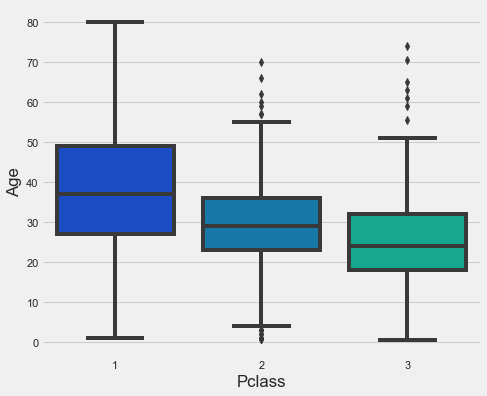

In [105]:
plt.figure(figsize=(7, 6))
sns.boxplot(x='Pclass', y='Age', data=train, palette='winter')

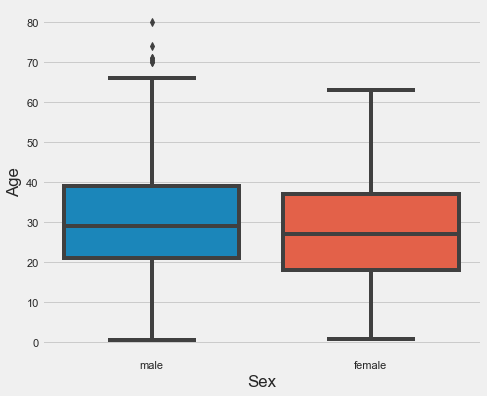

In [104]:
plt.figure(figsize=(7, 6))
sns.boxplot(x='Sex', y='Age', data=train)

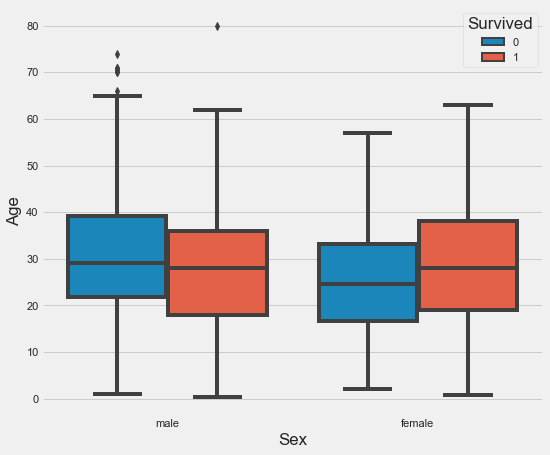

In [106]:
plt.figure(figsize=(8, 7))
sns.boxplot(x='Sex', y='Age', data=train, hue='Survived')

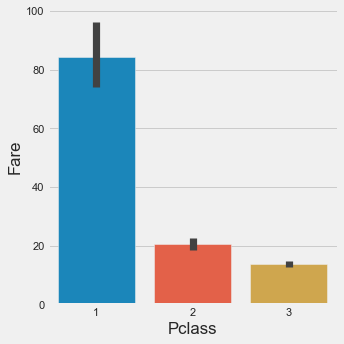

In [98]:
sns.catplot(x='Pclass', y='Fare', data=train, kind='bar')

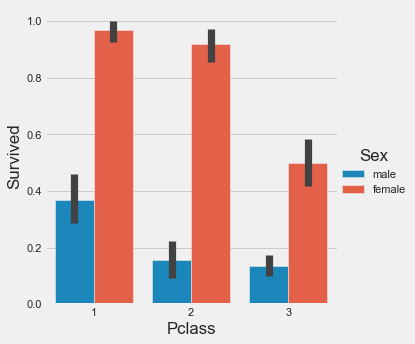

In [99]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=train, kind='bar')

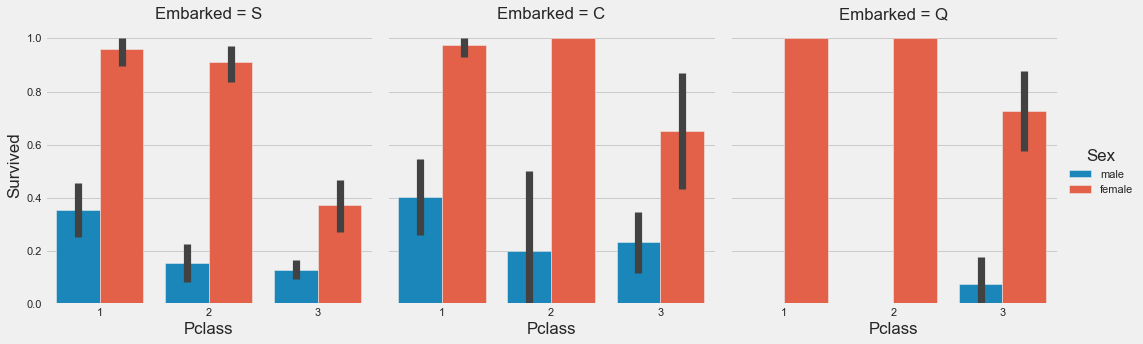

In [101]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', col='Embarked', data=train, kind='bar')

#### The percentage of female passengers who survived

In [8]:
Female = train.loc[train.Sex == 'female']["Survived"]
Percentage_female = sum(Female)/len(Female)*100

print("% of women who survived:", Percentage_female)

% of women who survived: 74.20382165605095


#### The percentage of male passengers who survived

In [14]:
male = train.loc[train.Sex == 'male']["Survived"]
Percentage_male = sum(male)/len(male)*100

print("% of men who survived:", Percentage_male)

% of men who survived: 18.890814558058924


- almost **75% of the women on board survived**, whereas only **19% of the men lived**. Since gender seems to be such a strong indicator of survival, the submission file in gender_submission.csv is not a bad first guess, and it makes sense that it performed reasonably well!

<h2 style="color:blue" align="left"> 6. Data Preprocessing </h2>

- We'll build a **random forest model**. This model is constructed of **several "trees" (there are three trees in the picture below, but we'll construct 100!)** that will individually consider each passenger's data and vote on whether the individual survived. Then, the random forest model makes a democratic decision: the outcome with the most votes wins!

![2. Titanic](img/Random Forest.JPG)

<h3 style="color:green" align="left"> Random Forest </h3>

In [18]:
features = ["Pclass", "Sex", "SibSp", "Parch"]

X = pd.get_dummies(train[features])
y = train["Survived"]

X_test = pd.get_dummies(test[features])

In [19]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [20]:
y_pred = model.predict(X_test)

In [27]:
model.score(X_test,y_pred)

1.0

In [22]:
submission = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': y_pred})
submission.to_csv('gender_submission.csv', index=False)

-------------------------------------------------------------------------------------------------------------------------------

<h3 style="color:green" align="left"> Linear Regression </h3>

In [24]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [25]:
y_pred = model.predict(X_test)

In [26]:
LR.score(X_test,y_pred)

0.692846338347459